In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35700,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30970,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15029,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
a=data.iloc[31519,1:].values.reshape(28,28)

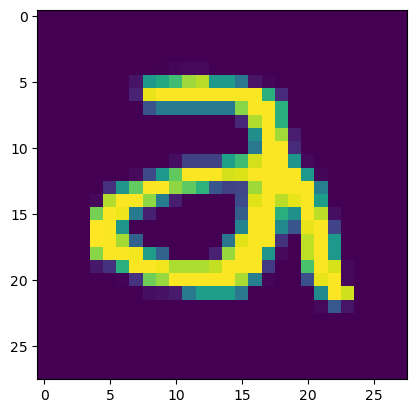

In [6]:
plt.imshow(a)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(['label'],axis=1),data['label'],test_size=.2,random_state=42)

In [9]:
y_train.shape

(33600,)

In [10]:
x_train.shape

(33600, 784)

In [11]:
minmax=MinMaxScaler()

In [12]:
x_train_scale=minmax.fit_transform(x_train)

In [13]:
x_train_scale.shape

(33600, 784)

In [14]:
x_test_scale=minmax.transform(x_test)

In [15]:
x_test_scale.shape

(8400, 784)

In [16]:
knn=KNeighborsClassifier()

In [17]:
knn.fit(x_train_scale,y_train)

KNeighborsClassifier()

In [18]:
y_pred=knn.predict(x_test_scale)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=56)

In [22]:
x_train_pca=pca.fit_transform(x_train_scale)

In [23]:
x_train_pca.shape

(33600, 56)

In [24]:
x_test_pca=pca.transform(x_test_scale)

In [25]:
x_test_pca.shape

(8400, 56)

In [26]:
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [27]:
y_pred2=knn.predict(x_test_pca)

In [28]:
accuracy_score(y_test,y_pred2)

0.9729761904761904

In [29]:
#for i in range (1,100):
 #   pca=PCA(n_components=i)
  #  x_train_pca=pca.fit_transform(x_train_scale)
   # x_test_pca=pca.transform(x_test_scale)
 #   knn=KNeighborsClassifier()
 #   knn.fit(x_train_pca,y_train)
 #   y_pred=knn.predict(x_test_pca)
  #  print('For PCA',i,'==>',accuracy_score(y_test,y_pred))